In [6]:
import pandas as pd
data_frame = pd.read_csv('FIFA19_official_data.csv')
data_frame.shape

(17943, 64)

In [8]:
data_frame.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating
count,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17929.000000,17943.000000,...,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000,17943.000000
mean,216447.995263,24.702057,66.331550,71.390793,1599.297665,1.107897,2.947277,2.368277,20.498355,49.874213,...,58.791339,47.262386,47.868082,45.820821,16.776737,16.532018,16.372959,16.539486,16.871816,65.771722
std,28988.660489,4.693238,6.879566,6.109331,276.606776,0.385554,0.664988,0.765885,16.532651,18.430707,...,11.577572,20.041492,21.638860,21.246583,17.903586,17.107419,16.718275,17.252367,18.212789,6.831813
min,16.000000,15.000000,48.000000,49.000000,718.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000
25%,201980.000000,21.000000,62.000000,67.000000,1459.000000,1.000000,3.000000,2.000000,9.000000,38.000000,...,52.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,61.000000
50%,223676.000000,24.000000,66.000000,71.000000,1639.000000,1.000000,3.000000,2.000000,18.000000,54.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,66.000000
75%,238359.500000,28.000000,71.000000,75.000000,1790.000000,1.000000,3.000000,3.000000,28.000000,64.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,70.000000
max,253155.000000,45.000000,94.000000,95.000000,2349.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,91.000000,93.000000,94.000000


In [12]:
data_frame.values

array([[176580, ' L. Suárez', 31, ..., 'ST', 87.0, '€164M'],
       [194765, ' A. Griezmann', 27, ..., 'LW', 87.0, '€145.6M'],
       [177003, ' L. Modrić', 32, ..., 'CM', 88.0, '€137.4M'],
       ...,
       [233215, ' C. Addai', 20, ..., 'GK', 50.0, '€98K'],
       [246648, ' O. Battersby', 16, ..., 'GK', 49.0, '€138K'],
       [248182, ' H. Sveijer', 16, ..., 'GK', 47.0, '€94K']], dtype=object)

In [30]:
df1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace('[\€,]','',regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€,]','',regex=True).apply(value_to_float)
df1['Wage'] = wage
df1['Value'] = value
df1['difference']=df1['Value']-df1['Wage']
df1


,Name,Wage,Value,difference
0,L. Suárez,450000.0,80000000.0,79550000.0
1,A. Griezmann,140000.0,71000000.0,70860000.0
2,L. Modrić,425000.0,67000000.0,66575000.0
3,M. Acuña,20000.0,19000000.0,18980000.0
4,K. De Bruyne,350000.0,93000000.0,92650000.0
...,...,...,...,...
17938,M. Brzozowski,0.0,40000.0,40000.0
17939,E. Destanoglu,2000.0,50000.0,48000.0
17940,C. Addai,1000.0,45000.0,44000.0
17941,O. Battersby,0.0,50000.0,50000.0


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Wage', ylabel='Value'>

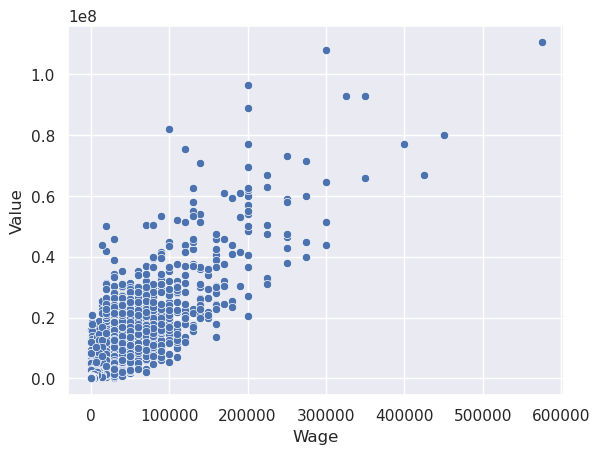

In [32]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [53]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index","$index"),
    ("(Wage,Value)","(@Wage,@Value)"),
    ("Name", "@Name")])

p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value', width=700, height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)

(B=(B(BGetting file://localhost/tmp/tmppqe5ks66.html(B

>